In [1]:
pip install numpy scipy scikit-learn gensim nltk pyLDAvis


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Step 1: Data Collection
from sklearn.datasets import fetch_20newsgroups

In [4]:
# Fetch the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

In [5]:
# Step 2: Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
# Download stopwords and wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
def preprocess(text):
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [9]:
# Preprocess all documents
preprocessed_docs = [preprocess(doc) for doc in documents]

In [10]:
# Step 3: Topic Modeling with LDA
from gensim import corpora
from gensim.models import LdaModel

# Tokenize preprocessed documents
tokenized_docs = [doc.split() for doc in preprocessed_docs]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_docs)

# Filter out extreme values
dictionary.filter_extremes(no_below=15, no_above=0.5)

# Create a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Apply LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

# Visualize the topics using pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

Topic: 0 
Words: 0.015*"space" + 0.007*"would" + 0.006*"earth" + 0.005*"system" + 0.005*"article" + 0.005*"u" + 0.005*"nasa" + 0.005*"year" + 0.005*"one" + 0.004*"mission"
Topic: 1 
Words: 0.009*"government" + 0.008*"key" + 0.007*"would" + 0.007*"people" + 0.006*"gun" + 0.006*"law" + 0.006*"right" + 0.006*"state" + 0.006*"u" + 0.005*"one"
Topic: 2 
Words: 0.011*"article" + 0.011*"like" + 0.010*"get" + 0.010*"one" + 0.010*"dont" + 0.009*"would" + 0.009*"car" + 0.007*"im" + 0.007*"good" + 0.007*"know"
Topic: 3 
Words: 0.013*"drive" + 0.010*"card" + 0.009*"system" + 0.008*"disk" + 0.007*"problem" + 0.007*"window" + 0.007*"one" + 0.007*"would" + 0.007*"driver" + 0.006*"use"
Topic: 4 
Words: 0.009*"people" + 0.008*"one" + 0.006*"would" + 0.006*"dont" + 0.006*"article" + 0.006*"child" + 0.006*"time" + 0.005*"like" + 0.005*"know" + 0.005*"said"
Topic: 5 
Words: 0.024*"x" + 0.017*"file" + 0.012*"image" + 0.011*"window" + 0.011*"program" + 0.008*"use" + 0.006*"available" + 0.006*"system" + 0.00

In [11]:
# Step 4: Word Embeddings and Similarity Measurement
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=2, workers=4)

# Get document vectors by averaging word vectors
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in w2v_model.wv.key_to_index]
    # Average the vectors of all words in the document
    return np.mean(w2v_model.wv[doc], axis=0)

# Compute document vectors
doc_vectors = np.array([document_vector(doc) for doc in tokenized_docs])

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(doc_vectors)

# Display similarity between first 5 documents
print(similarity_matrix[:5, :5])

[[0.99999994 0.5585178  0.6999215  0.5492795  0.58142555]
 [0.5585178  1.         0.35958105 0.79630953 0.83403975]
 [0.6999215  0.35958105 1.         0.50634295 0.5141773 ]
 [0.5492795  0.79630953 0.50634295 0.99999994 0.8786808 ]
 [0.58142555 0.83403975 0.5141773  0.8786808  0.9999999 ]]


In [12]:
# Extracting the list of words in each topic
topic_words = lda_model.show_topics(num_topics=10, num_words=10, formatted=False)
topics = {}
for topic in topic_words:
    topic_id, words = topic
    topics[topic_id] = [word for word, _ in words]

print("List of Words in Each Topic:")
for topic_id, words in topics.items():
    print(f"Topic {topic_id}: {words}")



List of Words in Each Topic:
Topic 0: ['space', 'would', 'earth', 'system', 'article', 'u', 'nasa', 'year', 'one', 'mission']
Topic 1: ['government', 'key', 'would', 'people', 'gun', 'law', 'right', 'state', 'u', 'one']
Topic 2: ['article', 'like', 'get', 'one', 'dont', 'would', 'car', 'im', 'good', 'know']
Topic 3: ['drive', 'card', 'system', 'disk', 'problem', 'window', 'one', 'would', 'driver', 'use']
Topic 4: ['people', 'one', 'would', 'dont', 'article', 'child', 'time', 'like', 'know', 'said']
Topic 5: ['x', 'file', 'image', 'window', 'program', 'use', 'available', 'system', 'application', 'data']
Topic 6: ['game', 'team', 'year', 'player', 'would', 'article', 'go', 'fan', 'hockey', 'one']
Topic 7: ['university', 'nntppostinghost', 'email', 'please', 'distribution', 'new', 'thanks', 'computer', 'sale', 'anyone']
Topic 8: ['power', 'v', 'radio', 'battery', 'wire', 'circuit', 'la', 'ground', 'georgia', 'detector']
Topic 9: ['god', 'one', 'people', 'would', 'say', 'christian', 'artic

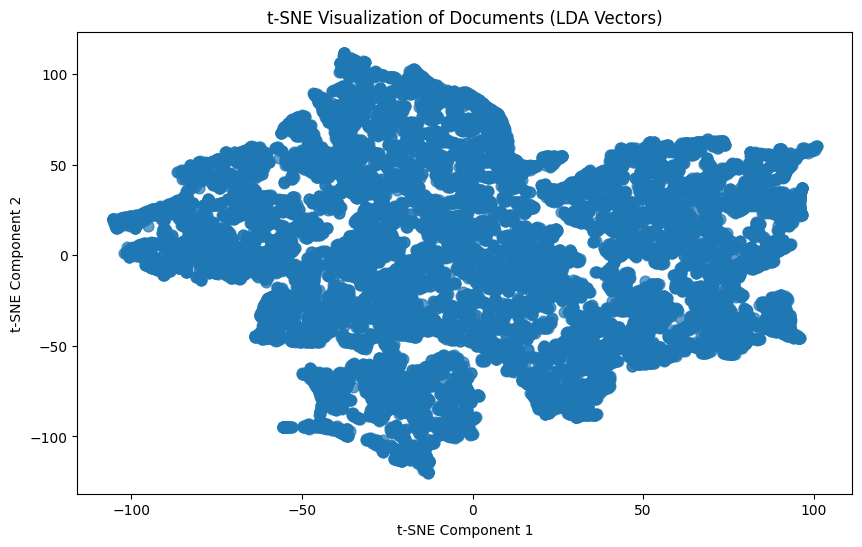

In [14]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert LDA topic distribution for each document into a NumPy array
lda_vectors = []

# Ensure every document has a full vector of topics, using minimum_probability to fill in all topics
for doc in corpus:
    topics_prob = lda_model.get_document_topics(doc, minimum_probability=0)
    lda_vectors.append([topic_prob[1] for topic_prob in topics_prob])

lda_vectors = np.array(lda_vectors)

# Apply t-SNE for dimensionality reduction
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
lda_tsne = tsne_model.fit_transform(lda_vectors)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(lda_tsne[:, 0], lda_tsne[:, 1], alpha=0.7, s=60)
plt.title('t-SNE Visualization of Documents (LDA Vectors)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [ ]:
# Step 5: Comparison of Document Similarity
# Similarity using LDA vectors
lda_similarity_matrix = cosine_similarity(lda_vectors)

print("Cosine Similarity Matrix using LDA Vectors (first 5 documents):")
print(lda_similarity_matrix[:5, :5])

# Similarity using Word Embeddings
embedding_similarity_matrix = cosine_similarity(doc_vectors)

print("Cosine Similarity Matrix using Word Embeddings (first 5 documents):")
print(embedding_similarity_matrix[:5, :5])